#  Transformée de fourier discrète
La technique usuelle pour déterminer les fréquences caractéristiques ainsi que l’amplitude des harmoniques qui composent un signal, consiste à calculer sa transformée de fourier. 

Dans une approche numérique, cette opération est effectuée sur un ensemble de valeurs échantillonnées.

Le but est d'utiliser ici le module scipy.fftpack pour calculer les transformées de fourier directe
et inverse.

## définitions

La transformée directe d'un signal __périodique__ s échantillonné en N points 
est définie par :
$$ft[k]=\sum_{n=0}^{N-1}  s[n] \exp(-i \frac{2\pi k}{N}n)$$
où $k \in [0, N-1]$ avec $i^2=-1$.

Sa transformée inverse est :

$$s[n]=\frac{1}{N} \sum_{k=0}^{N-1}  ft[n] \exp(+i \frac{2\pi k}{N}n)$$

Appliquer  ces définitions à un signal non périodique, revient à la périodiser avec une période entière N.


# Exercice
Calculer la transformée de fourier discrète d'un sinus par:

$$ G(t)=sin(\frac{2\pi}{T} t)$$

On fixera $t \in [0, T[$.

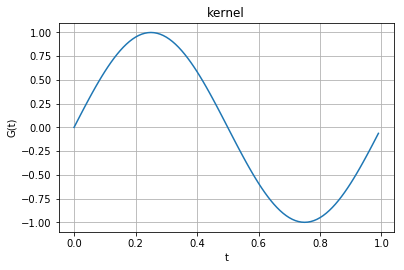

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter
import scipy.fftpack as fftpack

def kern(t, T):
    return np.sin(2*np.pi*t/T)

T=1
t=np.linspace(0, T, 100, endpoint=False)
G=kern(t, T)

fig=plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('kernel')

ax.set_xlabel('t')
ax.set_ylabel('G(t)')

plt.plot(t, G)
plt.grid(True)
plt.draw()
    
# A COMPLETER

plt.draw()

# Exercice
Calculer la transformée de fourier discrète d'une gaussienne définie par:

$$ G(t)=\exp(\frac{-t^2}{2 \sigma^2})$$

On prendra $\sigma=0.1$ et on fixera $t \in [-1, 1[$.


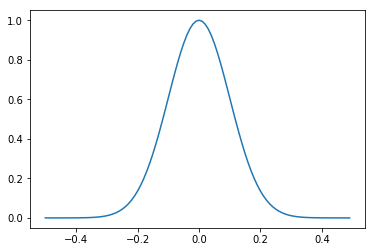

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter
import scipy.fftpack as fftpack

def gaussian_kern(x, sig):
    kern=np.exp(-x**2/(2*sig**2))
    return kern

T=1
t=np.linspace(-T/2, T/2, 100, endpoint=False)
G=gaussian_kern(t, 0.1)
plt.figure(1)
plt.plot(t, G)

# decalage vers la gauche de lx//2
# puis fft



# Convolution d'un signal par une gaussienne

Le produit de convolution de deux fonctions réelles ou complexes est défini par:

$$(f*g) (x) = \int_{-\infty}^{+\infty} f(t)\ g(x-t)\ dt$$

La convolution de deux signaux échantillonnés en N points,   est définie par:
$$(f*g)[p]=\sum_{m=0}^{n-1} f_m  . g_{p-m}$$ 

avec $p \in [0, n[$.
## Application du module scipy.fftpack
Exemple de convolution de  données par une gaussienne

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


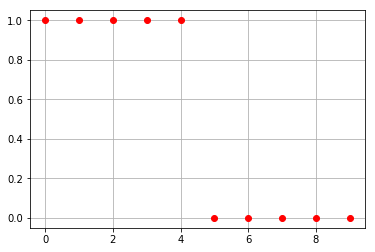

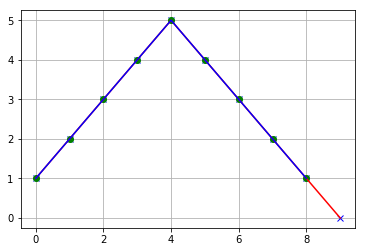

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.ndimage.filters as filter

def conv(f, g):
    n=len(f)
    cv=np.zeros(n)
    for p in range(n):
        for m in range(n):
# cv[p] += f[m]*g[(p-m+n)%n]        
            cv[p] += f[m]*g[p-m]         # ATTENTION ASTRUCE NUMPY g[-1] := g[n-1]  
    return cv

sq=np.ones(5)

npcv=np.convolve(sq, sq, mode='full')

cv_signal=signal.fftconvolve(sq, sq, mode='full')

#fftcv=np.convolve(sq, sq)
sq=np.pad(sq, (0, len(sq)), mode='constant') # (before, after)
print(sq)
plt.figure(1)
plt.plot(sq, 'ro')
plt.grid()

sq2cv=conv(sq, sq)

sqinv=sq[::-1]
cv_filter=filter.convolve1d(sq, sqinv, mode='constant', cval=0)

plt.figure(2)
#plt.plot(npcv, 'ro')
plt.plot(cv_filter, 'bx')
plt.plot(cv_signal, 'go')
plt.plot(sq2cv, 'r')
plt.plot(npcv, 'b')

plt.grid()
plt.show()

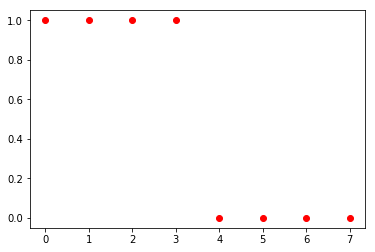

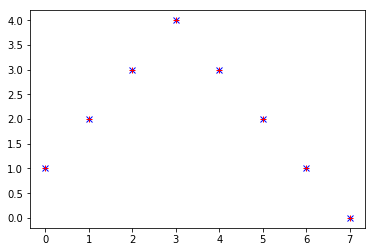

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.ndimage.filters as filter

def conv(f, g):
    n=len(f)
    cv=np.zeros(n)
    for p in range(n):
        for m in range(n):
# cv[p] += f[m]*g[(p-m+n)%n]        
            cv[p] += f[m]*g[p-m]         # ATTENTION ASTRUCE NUMPY g[-1] := g[n-1]  
    return cv

sq=np.ones(4)
sq=np.pad(sq, (0, len(sq)), mode='constant') # (before, after)
sqinv=sq[::-1]
plt.figure()
plt.plot(sq, 'ro')
plt.show()

fftcv=filter.convolve(sq, sqinv, mode='constant')
fftcv=filter.convolve(sqinv, sq, mode='constant')

#sq=np.pad(sq, (0, len(sq)), mode='constant') # (before, after)
sq2cv=conv(sq, sq)

#fftcv=filter.convolve1d(sq, sq, mode='reflect')
plt.figure()
plt.plot(fftcv, 'bx')
plt.plot(sq2cv, 'r+')
plt.show()

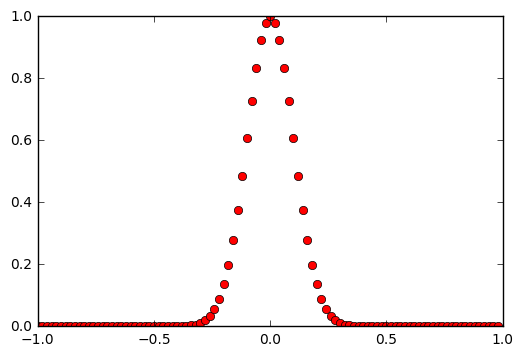

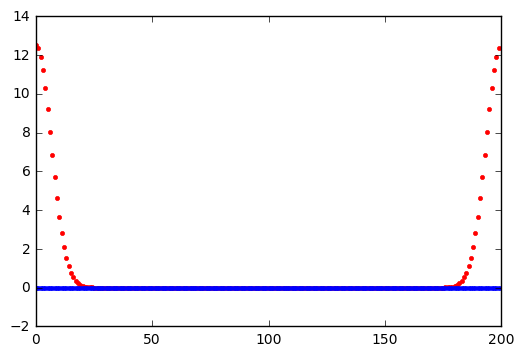

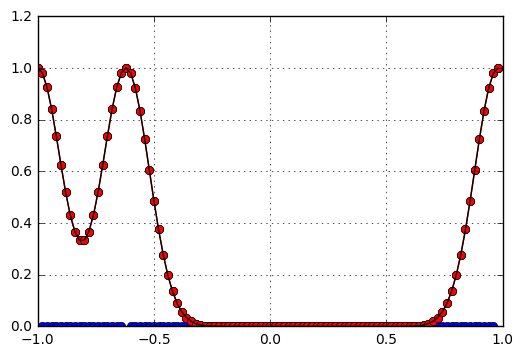

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter
import scipy.fftpack as fftpack 

def gaussian_kern(x, sig):
    kern=np.exp(-x**2/(2*sig**2))
    return kern

def conv(f, g):
    n=len(f)
    cv=np.zeros(n)
    for p in range(n):
        for m in range(n):
# cv[p] += f[m]*g[(p-m+n)%n]        
            cv[p] += f[m]*g[p-m]         # ATTENTION ASTRUCE NUMPY g[-1] := g[n-1]  
    return cv

def fftconv(q, G):
    assert q.shape == G.shape
    
    lx=q.shape[0]
# zero padding    
    G=np.pad(G, ((0, lx)), mode='constant') # (before, after)
    q=np.pad(q, ((0, lx)), mode='constant') # (before, after)
# decalage vers la gauche    
    G=np.roll(G, -lx//2)
 
    fftq = fftpack.fft(q)
    fftG = fftpack.fft(G)
    
    plt.figure(1)
    plt.plot(fftG.real, 'r.')
    plt.plot(fftG.imag, 'b.')
    
    fft  = fftq*fftG
    fftcv= fftpack.ifft(fft)

    cv=fftcv[0:lx]
    cv=np.real(cv)
    return cv

x=np.linspace(-1, 1, 100, endpoint=False)
G=gaussian_kern(x, 0.1)
q=np.zeros(len(G))

q[0]=1  # placer en 0 pour voir l'effet du zero padding
q[19]=1
q[99]=1  # placer en 99 pour voir l'effet du zero padding


plt.figure()
plt.plot(x, G, 'ro')
plt.show()

cvfft=fftconv(q, G)   
cv=conv(q, G)

npcv=filter.convolve1d(q, G, mode='constant')

#cv=np.real(filter.convolve1d(q, G, ) ) # DANGER mode='reflect', cval=0 ==> mode='constant', cval=0
cv=np.real(filter.convolve1d(q, G, mode='constant', cval=0) )

plt.figure()
plt.plot(x, cvfft, 'r-')
plt.plot(x, cv, 'ro')
plt.plot(x, q[0:len(x)], 'o')

plt.figure()
plt.plot(x, cv[0:len(x)], '.')
plt.plot(x, npcv[0:len(x)], 'o')

#npcvs=np.convolve(q, G, mode='same')  # ATTENTION DECALAGE
npcvs=np.convolve(q, G[::-1], mode='same')  # PROBLEME REGLE
plt.plot(x, npcvs, 'k-')

plt.grid()
plt.show()


In [ ]:
help(filter.convolve1d)

In [ ]:
help(signal.fftconvolve)

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter
import scipy.fftpack as fftpack

from IPython.display import display
import ipywidgets as ipyw
import matplotlib.pylab as plt

def kern(t, T):
    return np.sin(2*np.pi*t/T)

def fft_draw(k):

    fig=plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    
    ax.plot(fftG.imag)
    vline = ax.axvline(1, color='k')
    vline.set_xdata((k, k))
    t.value='fft values : ({:+8.5f} , {:+8.5f})'.format(fftG[k].real, fftG[k].imag)

    plt.grid(True)
    plt.draw()

T=1
t=np.linspace(0, T, 100, endpoint=False)
G=kern(t, T)
fftG = fftpack.fft(G)
    
k_slider = ipyw.IntSlider(min=0, max=len(t)-1, step=1, value=0)
w=ipyw.interactive(fft_draw, k=k_slider)
t=ipyw.Label( value='', description='fft values :', disabled=False)
    
display(w, t)


interactive(children=(IntSlider(value=0, description='k', max=99), Output()), _dom_classes=('widget-interact',))

Label(value='fft values : (-0.00000 , +0.00000)', description='fft values :')

#  Spectres interactifs

Le but est de tracer les  composantes réelles et imaginaires d'une transformée de fourier,
de  retrouver les valeurs numériques en déplaçant un curseur.

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter
import scipy.fftpack as fftpack

from IPython.display import display
import ipywidgets as ipyw
import matplotlib.pylab as plt

def kern(t, T):
    return np.sin(2*np.pi*t/T)

def fft_draw(k):

    fig=plt.figure()
    ax = fig.add_subplot(121)
    fig.subplots_adjust(top=0.85)
    ax.set_title('Real Part')
    plt.plot(fftG.real, 'r.')
    plt.grid(True)
    
    hline = ax.axhline(1, color='r')
    vline = ax.axvline(1, color='k')
    
    re_fft=fftG[k].real
    hline.set_ydata((re_fft, re_fft))
    vline.set_xdata((k, k))
    
    ax = fig.add_subplot(122)
    fig.subplots_adjust(top=0.85)
    ax.set_title('Imag Part')
    plt.plot(fftG.imag, 'b.')
    plt.grid(True)

    hline = ax.axhline(1, color='b')
    vline = ax.axvline(1, color='k')
    
    im_fft=fftG[k].imag
    hline.set_ydata((im_fft, im_fft))
    vline.set_xdata((k, k))

    
#    vline.set_ydata((im_fft, im_fft))
    
    t.value='fft values : ({:+8.5f} , {:+8.5f})'.format(re_fft, im_fft)

    plt.grid(True)
    plt.draw()

T=1
t=np.linspace(0, T, 100, endpoint=False)
G=kern(t, T)
fftG = fftpack.fft(G)
    
k_slider = ipyw.IntSlider(min=0, max=len(t)-1, step=1, value=0)
w=ipyw.interactive(fft_draw, k=k_slider)
t=ipyw.Label( value='', description='fft values :', disabled=False)
    
display(w, t)



interactive(children=(IntSlider(value=0, description='k', max=99), Output()), _dom_classes=('widget-interact',))

Label(value='fft values : (-0.00000 , +0.00000)', description='fft values :')